In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("bengkulu.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  314 non-null    datetime64[ns]
 1   Tn       307 non-null    float64       
 2   Tx       312 non-null    float64       
 3   Tavg     312 non-null    float64       
 4   RH_avg   312 non-null    float64       
 5   RR       246 non-null    float64       
 6   ss       305 non-null    float64       
 7   ff_x     313 non-null    float64       
 8   ddd_x    312 non-null    float64       
 9   ff_avg   313 non-null    float64       
 10  ddd_car  313 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 27.1+ KB


<ipython-input-2-041ac831b2a5>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,19.8,29.8,1.0,23.7
1,2023-02-01,18.8,30.2,12.2,24.1
2,2023-03-01,20.0,29.6,16.0,22.9
3,2023-04-01,20.0,27.9,22.0,23.9
4,2023-05-01,20.4,29.0,NaN,23.7
...,...,...,...,...,...
309,2023-10-28,19.2,31.8,0.0,24.4
310,2023-10-29,19.2,32.2,3.6,26.1
311,2023-10-30,20.8,32.8,0.0,27.4
312,2023-10-31,20.8,32.4,0.0,27.6


In [4]:
# cek duplikat
df1.duplicated().sum()

9

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,19.8,29.8,1.0,23.7
1,31,31,2023-01-02,NaN,29.8,7.4,25.2
2,59,60,2023-01-03,19.0,29.5,0.2,24.2
3,90,92,2023-01-04,21.2,29.6,7.0,24.8
4,120,123,2023-01-05,22.2,31.0,NaN,25.3
...,...,...,...,...,...,...,...
300,162,167,2023-12-06,22.4,30.8,NaN,25.6
301,192,198,2023-12-07,21.6,27.8,0.2,24.4
302,223,230,2023-12-08,21.4,31.0,0.0,24.7
303,254,262,2023-12-09,18.4,34.4,0.0,24.2


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          6
Tx          2
RR         64
Tavg        2
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(ma)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

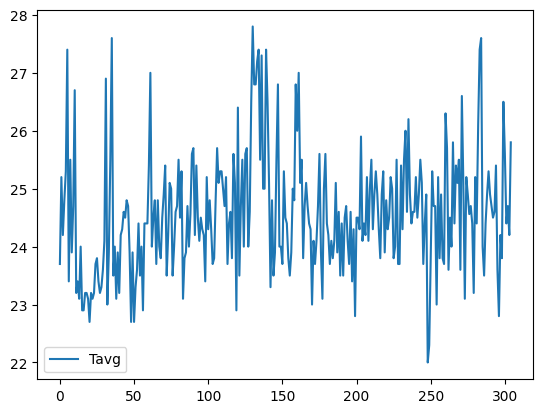

In [10]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

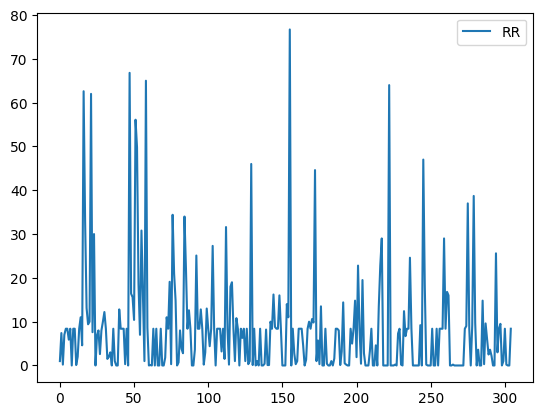

In [11]:
#plotting tavg
df1[['RR']].plot()

In [12]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,19.800000,29.8,1.000000,23.7,29.8,25.2,7.400000
1,31,31,2023-01-02,20.587625,29.8,7.400000,25.2,29.5,24.2,0.200000
2,59,60,2023-01-03,19.000000,29.5,0.200000,24.2,29.6,24.8,7.000000
3,90,92,2023-01-04,21.200000,29.6,7.000000,24.8,31.0,25.3,8.389627
4,120,123,2023-01-05,22.200000,31.0,8.389627,25.3,31.4,27.4,8.389627
...,...,...,...,...,...,...,...,...,...,...
300,162,167,2023-12-06,22.400000,30.8,8.389627,25.6,27.8,24.4,0.200000
301,192,198,2023-12-07,21.600000,27.8,0.200000,24.4,31.0,24.7,0.000000
302,223,230,2023-12-08,21.400000,31.0,0.000000,24.7,34.4,24.2,0.000000
303,254,262,2023-12-09,18.400000,34.4,0.000000,24.2,33.0,25.8,8.389627


In [13]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,1.000000,23.7,25.2,7.400000
1,7.400000,25.2,24.2,0.200000
2,0.200000,24.2,24.8,7.000000
3,7.000000,24.8,25.3,8.389627
4,8.389627,25.3,27.4,8.389627
...,...,...,...,...
300,8.389627,25.6,24.4,0.200000
301,0.200000,24.4,24.7,0.000000
302,0.000000,24.7,24.2,0.000000
303,0.000000,24.2,25.8,8.389627


In [14]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,1.000000,23.7,25.2,7.400000
1,7.400000,25.2,24.2,0.200000
2,0.200000,24.2,24.8,7.000000
3,7.000000,24.8,25.3,8.389627
4,8.389627,25.3,27.4,8.389627
...,...,...,...,...
299,1.000000,26.5,25.6,8.389627
300,8.389627,25.6,24.4,0.200000
301,0.200000,24.4,24.7,0.000000
302,0.000000,24.7,24.2,0.000000


In [15]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,1.000000,23.7,25.2,7.400000,0
1,7.400000,25.2,24.2,0.200000,1
2,0.200000,24.2,24.8,7.000000,2
3,7.000000,24.8,25.3,8.389627,3
4,8.389627,25.3,27.4,8.389627,4
...,...,...,...,...,...
299,1.000000,26.5,25.6,8.389627,299
300,8.389627,25.6,24.4,0.200000,300
301,0.200000,24.4,24.7,0.000000,301
302,0.000000,24.7,24.2,0.000000,302


In [17]:
#data training dan testing
X = df1['Indeks']
y = df1["pta"]

X1 = df1['Tavg']
y1 = df1["pta"]

X2 = df1['RR']
y2 = df1["ptr"]

X3 = df1['Indeks']
y3 = df1["RR"]

In [18]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [19]:
X_train = np.array(X_train).reshape(-1, 1)

In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
#testing
X_test1 = np.array(X_test).reshape(-1, 1)
pred1 = lr.predict(X_test1)
pred1

array([24.87796628, 24.73927202, 24.25384211, 24.49655707, 24.66992489,
       23.66439151, 23.7684122 , 24.28851568, 24.80861915, 24.60057776,
       24.60057776, 24.01112716, 24.77394559, 24.28851568, 24.66992489,
       24.28851568, 24.25384211, 25.1553548 , 24.94731341, 24.21916855,
       24.53123063, 24.35786281, 24.98198698, 24.49655707, 24.84329272,
       24.73927202, 24.87796628, 24.21916855, 25.25937549, 24.73927202,
       24.04580072, 24.77394559, 24.66992489, 24.55262983, 24.60057776,
       24.49655707, 24.08047429, 24.77394559, 24.49655707, 25.08600767,
       25.53676401, 25.60611114, 24.35786281, 24.18449498, 24.49655707,
       24.66992489, 24.80861915, 24.66992489, 24.60057776, 24.53123063,
       24.5659042 , 24.84329272, 24.21916855, 23.94178003, 24.42720994,
       24.28851568, 25.22470193, 24.91263985, 24.49655707, 24.60057776,
       24.42720994])

In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred1)
mae

0.836908422760911

In [23]:
X_test['Indeks'] = X_test.index
X_test

243                                                    25.5
244                                                    25.1
245                                                    23.7
246                                                    24.4
247                                                    24.9
                                ...                        
300                                                    25.6
301                                                    24.4
302                                                    24.7
303                                                    24.2
Indeks    Int64Index([243, 244, 245, 246, 247, 248, 249,...
Name: Tavg, Length: 62, dtype: object

In [24]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
243,24.877966
244,24.739272
245,24.253842
246,24.496557
247,24.669925
...,...
299,25.224702
300,24.912640
301,24.496557
302,24.600578


In [25]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-25-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,23.7,NaN
1,25.2,NaN
2,24.2,NaN
3,24.8,NaN
4,25.3,NaN
...,...,...
299,26.5,25.224702
300,25.6,24.912640
301,24.4,24.496557
302,24.7,24.600578


<Axes: >

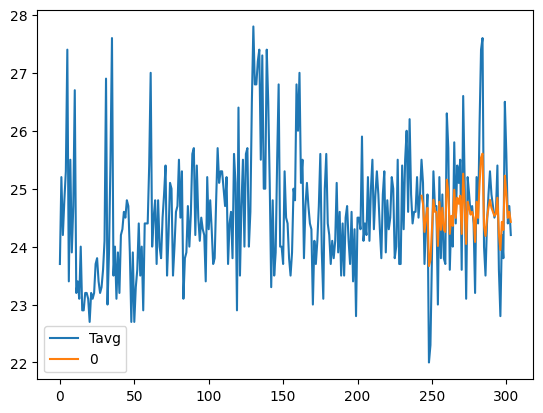

In [26]:
kan.plot()

In [27]:
new_data = [[0],[1],[2],[3],[4],[5],[6]]
lr.predict(new_data)

array([16.03620722, 16.38294287, 16.72967852, 17.07641417, 17.42314982,
       17.76988547, 18.11662112])

In [28]:
kan.to_json('prediksi_bengkulu')